
## 1. 项目介绍
> 来自Kaggle的数据集包含了泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。分析有哪些因素会让船上的人生还率更高？

> 1. 女性的生还率会比较高
2. 儿童的生还率会比较高
3. 乘员级别高的生还率会比较高

## 2. 数据清理

In [16]:
import pandas as pd


# 读取csv文件
filename = 'titanic_data.csv'
df = pd.read_csv(filename)

# 清理数据
def format_df(df):
    # 删除年龄为空的行
    df = df[pd.notnull(df['Age'])]
    # 转换年龄为整型
    df.loc[:, 'Age'] = df['Age'].apply(int)
    return df 

new_df = format_df(df)
new_df.head()
#miss_age_df = df[pd.isnull(df['Age'])]
#miss_age_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## 3. 分析数据
### 3.1. 按年龄性别组进行分析
#### 分组方式
>
小于等于18岁的青少年为一组，成年男子为一组，成年女子为一组

#### 结论
> 从柱状图可以看出，成年女性的生还率 > 青少年 > 成年男性


Populating the interactive namespace from numpy and matplotlib


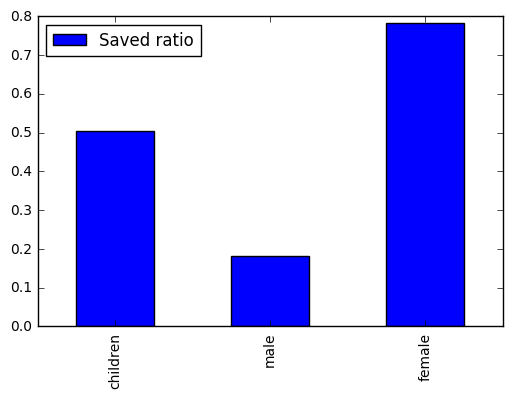

In [21]:
def get_age_class_ratio(age_group, level):
      # 年龄和乘员级别
      if age_group and level:
          if age_group == 'child':
              series = df[(df.Age <= 18)
                          & (df.Pclass == level) ]['Survived']
          elif age_group in ('male', 'female'):
              series = df[(df.Sex == age_group)
                          & (df.Age > 18)
                          & (df.Pclass == level)]['Survived']
      # 年龄
      elif age_group:
          if age_group == 'child':
              series = df[df.Age <= 18]['Survived']
          elif age_group in ('male', 'female'):
              series = df[(df.Sex == age_group)
                          & (df.Age > 18)]['Survived']
      # 级别
      else:
          series = df[df.Pclass == level]['Survived']

      saved_ratio = series.sum() / (series.shape[0] * 1.0)
      return saved_ratio

  
age_group_saved_df = pd.DataFrame(
    data={'Saved ratio': [get_age_class_ratio('child', None), get_age_class_ratio('male', None), get_age_class_ratio('female', None)]},
    index=['Children', 'Men', 'Women']
)

%pylab inline
import matplotlib.pyplot as plt

age_group_saved_df.index = [
    'children', 'male', 'female'
]
age_group_saved_df.plot(kind='bar')

### 3.2. 按乘员级别组进行分析
#### 分组方式
>
class1为一组，class2为一组，class3为一组

#### 结论
> 从柱状图可以看出，class1 > class2 > class3

136 216
87 184
119 491
Populating the interactive namespace from numpy and matplotlib


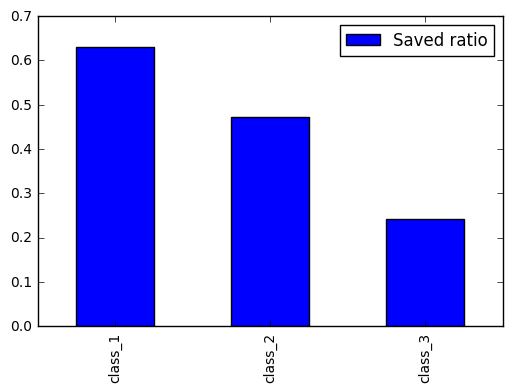

In [11]:
class_group_saved_df = pd.DataFrame(
    data={'Saved ratio': [get_age_class_ratio(None, 1), get_age_class_ratio(None, 2), get_age_class_ratio(None, 3)]},
    index=['class 1', 'class 2', 'class 3']
)

%pylab inline
import matplotlib.pyplot as plt

class_group_saved_df.index = [
    'class_1', 'class_2', 'class_3'
]
class_group_saved_df.plot(kind='bar')

### 3.3. 按乘员和乘员级别组进行分析
#### 分组方式
>
青少年按class分三组，成年男子按class分三组，成年女子按class分三组

#### 结论
> 从柱状图可以看出，除了成年男子中class3大约class2，其他乘员级别内都按class顺序排列；成年女子略高于青少年，成年男子最低

14 16
23 29
33 94
36 96
6 84
27 202
72 74
54 60
25 59
Populating the interactive namespace from numpy and matplotlib


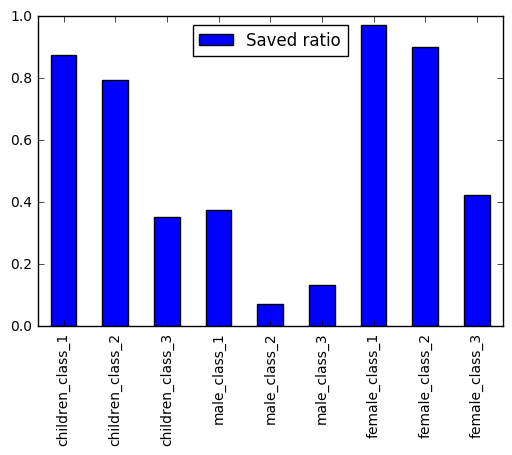

In [12]:
index_arrays = [np.array(['Children']*3 + ['Men']*3 + ['Women']*3),
               np.array(['class 1', 'class 2', 'class 3']*3)]
age_class_group_saved_df = pd.DataFrame(
    data={'Saved ratio': [get_age_class_ratio('child', 1), 
                          get_age_class_ratio('child', 2), 
                          get_age_class_ratio('child', 3),
                          get_age_class_ratio('male', 1), 
                          get_age_class_ratio('male', 2), 
                          get_age_class_ratio('male', 3),
                          get_age_class_ratio('female', 1), 
                          get_age_class_ratio('female', 2), 
                          get_age_class_ratio('female', 3)
                         ]},
    index=index_arrays
)


%pylab inline
import matplotlib.pyplot as plt

age_class_group_saved_df.index = [
    'children_class_1', 'children_class_2', 'children_class_3',
    'male_class_1', 'male_class_2', 'male_class_3',
    'female_class_1', 'female_class_2', 'female_class_3'
]
age_class_group_saved_df.plot(kind='bar')